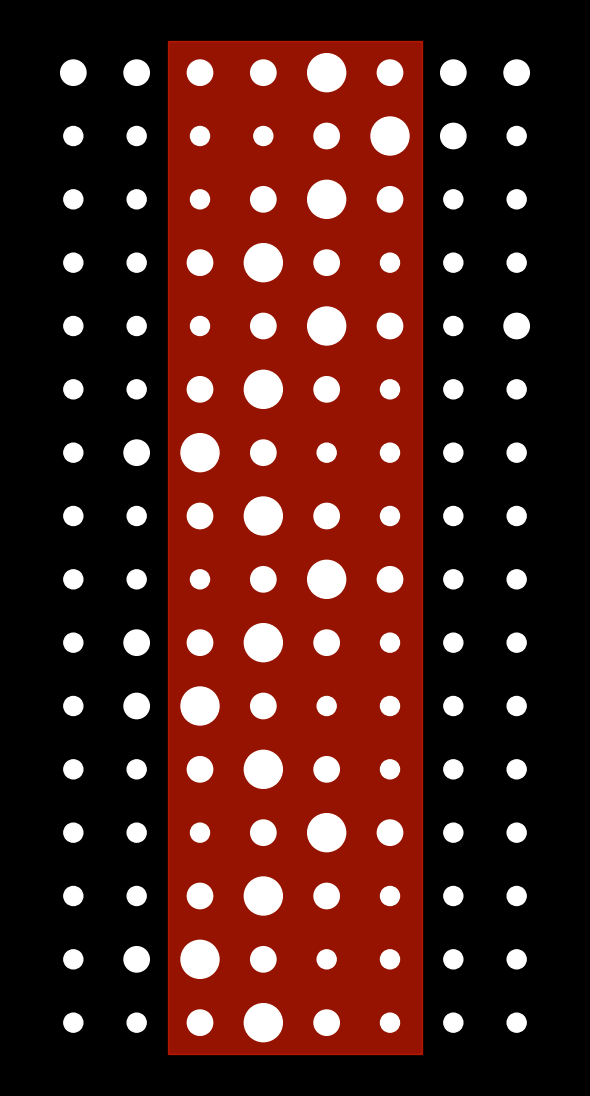

In [3]:
import matplotlib.pyplot as plt

# Размеры сетки
rows, cols = 16, 8

# Размеры отверстий
small_radius = 3
medium_radius = 4
large_radius = 6

# Координаты отверстий (row, col): 'size'
# Пример молнии + требование по первому ряду
hole_map = {}

# 1 строка — обязательное условие
for c in range(1, 9):
    hole_map[(1, c)] = 'medium'
hole_map[(1, 5)] = 'large'
hole_map[(5, 8)] = 'medium'
hole_map[(9, 4)] = 'medium'
hole_map[(10, 2)] = 'medium'
hole_map[(11, 2)] = 'medium'
hole_map[(11, 3)] = 'medium'


def fill_holes1():
    # Молния (пример координат зигзага)
    lightning_coords = [
        (2, 6), (3, 5), (4, 4), (5, 5),
        (6, 4), (7, 3), (8, 4), (9, 5),
        (10, 4), (11, 3), (12, 4), (13, 5),
        (14, 4), (15, 3), (16, 4)
    ]
    for coord in lightning_coords:
        hole_map[coord] = 'large'

    # Вокруг молнии — средние отверстия (ореол)
    aura_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for r, c in lightning_coords:
        for dr, dc in aura_offsets:
            rr, cc = r + dr, c + dc
            if 1 <= rr <= rows and 1 <= cc <= cols and (rr, cc) not in hole_map:
                hole_map[(rr, cc)] = 'medium'

def fill_holes2():
    lightning_coords = [
        (3, 6), (3, 7), (2, 6), (4,5), (4,6), (5, 4), (7, 5), (9, 3), (11, 4), (13, 2), (15, 3)
    ]
    for coord in lightning_coords:
        hole_map[coord] = 'large'
        
    aura = [(2,5), (6, 4), (6,5)
        ]
    for coord in aura:
        hole_map[coord] = 'medium'


fill_holes1()

# Остальные — маленькие
for r in range(1, rows + 1):
    for c in range(1, cols + 1):
        if (r, c) not in hole_map:
            hole_map[(r, c)] = 'small'

# Отрисовка
fig, ax = plt.subplots(figsize=(6, 12), facecolor='black')
# ax.set_facecolor('black')
ax.set_xlim(0, cols + 1)
ax.set_ylim(0, rows + 1)
ax.set_aspect('equal')
ax.axis('off')

# Вертикальная красная полоса (столбцы 3–6 включительно)
ax.add_patch(plt.Rectangle((2.5, 0.5), 4, rows, color='#f92101', alpha=0.6))


# Отверстия
for (r, c), size in hole_map.items():
    if size == 'small':
        radius = small_radius
        color = 'white'
    elif size == 'medium':
        radius = medium_radius
        color = 'white'
    else:
        radius = large_radius
        color = 'white'

    circle = plt.Circle((c, rows + 1 - r), radius / 20, color=color)
    ax.add_patch(circle)

plt.tight_layout()
plt.show()

